## Logistic Regression

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import collections
from scipy import stats
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split
from math import sqrt
from datetime import datetime, timedelta
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
# for plotting confusion matrix
from sklearn.metrics import confusion_matrix
from collections import Counter


from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC, SVR
from sklearn.model_selection import cross_val_score, cross_validate

In [4]:
dsdata = pd.read_csv('new_ds_salaries.csv')
ds_new = dsdata.copy()


# Exploring the numeric data in hr_data
ds_num = ds_new.select_dtypes(['int64', 'float64']).copy()
ds_num.head()


,work_year,salary,salary_in_usd,remote_ratio,compare_avr_salary,experience_levelN,company_sizeN,employment_typeN,employee_continentN,company_continentN
0,2020,70000,79833,0,1,1,2,1,0,0
1,2020,260000,260000,0,1,2,0,1,1,1
2,2020,85000,109024,1,1,2,1,1,0,0
3,2020,20000,20000,0,0,1,0,1,2,2
4,2020,150000,150000,1,1,2,2,1,2,2


In [5]:
ds_new.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,compare_avr_salary,experience_levelN,company_sizeN,employment_typeN,company_continent,employee_continent,job_type,domain,employee_continentN,company_continentN
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,...,1,1,2,1,EUROPE,EUROPE,Scientist,Data science,0,0
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,...,1,2,0,1,ASIA,ASIA,Scientist,Machine Learning,1,1
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,1,GB,...,1,2,1,1,EUROPE,EUROPE,Engineer,Data science,0,0
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,...,0,1,0,1,NORTH AMERICA,NORTH AMERICA,Analyst,Data science,2,2
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,1,US,...,1,2,2,1,NORTH AMERICA,NORTH AMERICA,Engineer,Machine Learning,2,2


In [3]:
from sklearn.linear_model import LogisticRegression

X = ds_num.drop(["work_year", "salary", "salary_in_usd"], axis = 1)
Y = dsdata["salary_group"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=48)
logreg =  LogisticRegression(solver='liblinear') 
logreg.fit(X_train,Y_train) 

Y_pred=logreg.predict(X_test) 

Y_pred 

array(['low', 'low-mid', 'low-mid', 'low-mid', 'low-mid', 'low',
       'low-mid', 'low-mid', 'low-mid', 'low', 'low-mid', 'low-mid',
       'low', 'low-mid', 'low', 'low-mid', 'low', 'low', 'low', 'low-mid',
       'low', 'low-mid', 'low', 'low-mid', 'low', 'low-mid', 'low-mid',
       'low-mid', 'low-mid', 'low-mid', 'mid', 'low', 'low', 'low-mid',
       'mid', 'low-mid', 'low-mid', 'low', 'low', 'low-mid', 'low-mid',
       'low-mid', 'low-mid', 'mid', 'low', 'low-mid', 'low-mid',
       'low-mid', 'low', 'low-mid', 'low-mid', 'mid', 'low-mid', 'low',
       'mid', 'low-mid', 'low-mid', 'low-mid', 'low-mid', 'low-mid',
       'low-mid', 'low-mid', 'low-mid', 'low-mid', 'low-mid', 'low',
       'mid-high', 'low-mid', 'low-mid', 'low', 'low-mid', 'low',
       'low-mid', 'low-mid', 'low', 'low', 'mid', 'low', 'low', 'low-mid',
       'low', 'low-mid', 'low-mid', 'low-mid', 'low-mid', 'low',
       'low-mid', 'low', 'low', 'low', 'low-mid', 'low-mid', 'low-mid',
       'mid', 'low-mid

In [9]:
print("Accuracy:",accuracy_score(Y_test, Y_pred)) 

Accuracy: 0.47540983606557374


In [11]:
cnf_matrix = confusion_matrix(Y_test, Y_pred) 

cnf_matrix 

array([[ 0,  0,  2,  0,  0,  0],
       [ 0, 23, 17,  0,  0,  0],
       [ 0, 10, 29,  2,  0,  0],
       [ 0,  0, 22,  6,  1,  0],
       [ 0,  0,  8,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

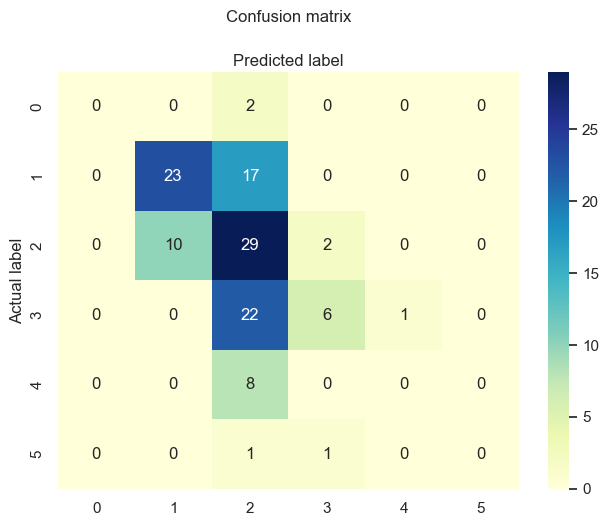

In [12]:
class_names=[0,1] # name  of classes 

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 

# create heatmap 
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Confusion matrix', y=1.1) 

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')

In [11]:
X = ds_num.drop(["work_year", "salary", "salary_in_usd"], axis = 1)
Y = dsdata["compare_avr_salary"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
logreg =  LogisticRegression(solver='liblinear') 
logreg.fit(X_train,Y_train) 

Y_pred=logreg.predict(X_test) 

Y_pred 

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0],
      dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

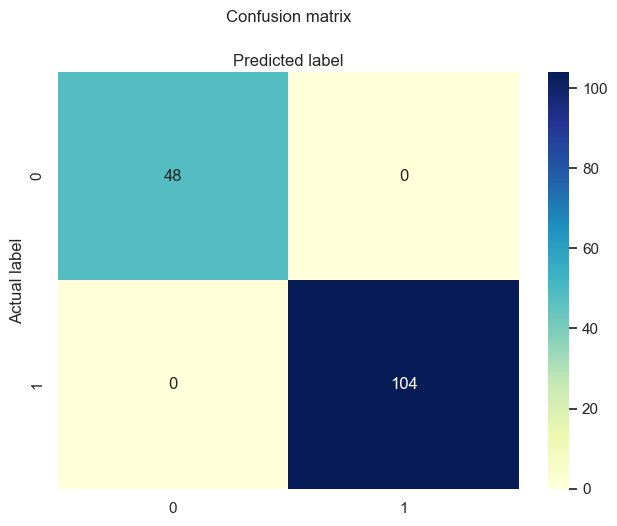

In [12]:
cnf_matrix = confusion_matrix(Y_test, Y_pred) 

class_names=[0,1] # name  of classes 

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 

# create heatmap 
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Confusion matrix', y=1.1) 

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')

In [13]:
print("Accuracy:",accuracy_score(Y_test, Y_pred)) 

Accuracy: 1.0


# ????